<center><h2>Deep Deterministic Policy Gradient (DDPG)</h2></center>

This is a ```Tensorflow 2.x``` implementation of DDPG. Any continuous gym environment can be used.
Here I provide a minimal version of implementation using the ```Pendulum-v0``` environment

**Author:** [AshBabu](https://github.com/ashbabu)<br>
**Date:** 01/08/2020

Import the required libraries. The Loop_handler context manager allows you to stop the iterations 
with ```Ctrl+C``` in a nice way so that the script can carry on after the loop. Credits to [Arthur Bouton](https://github.com/Bouty92/MachineLearning) for this script and a detailed description.

In [1]:
import numpy as np
import gym
import tensorflow as tf
from looptools import Loop_handler, Monitor
from replaybuffer import ReplayBuffer
from actor_critic import Actor, Critic
from ounoise import OUNoise
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from ddpg import DDPG

In [3]:
env = gym.make('Pendulum-v0')
render = True
s_dim, a_dim = env.observation_space.shape[0], env.action_space.shape[0]
critic_lr, actor_lr = 0.002, 0.001
total_episodes = 100
gamma = 0.99  # Discount factor for future rewards
tau = 0.005  # Used to update target networks

Switch the train flag for training and evaluation

In [ ]:
train = False

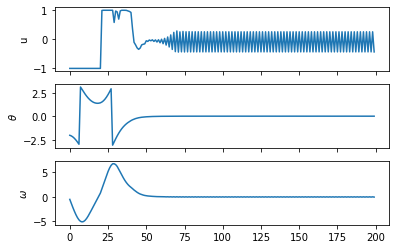

Done


In [6]:
ddpg_ = DDPG(env, s_dim=s_dim, a_dim=a_dim, gamma=gamma, tau=tau,
            actor_lr=actor_lr, critic_lr=critic_lr)
if train:
    ddpg_.train()
else: # evaluating the trained policy
    actor_trained = Actor(s_dim, a_dim).model()
    actor_trained.load_weights('training/target_actor_weights')
    s_trained, a_trained = ddpg_.collect_data(actor_trained)
    ddpg_.plot_results(actions=a_trained, states=s_trained, train=False, title='Trained_model')
    plt.show()
print('Done')

In the above plot, ```u``` is the control input, $\theta$ and $\omega$ are respectively the joint angle and joint velocity

The plot of episodic reward is as follows

<img style="float: left;" title="Episodic Rewards" src="avg_episodic_reward.png" alt="Episodic Rewards" width="300" height="300"/>


### References:
1. ***Original Paper:***     http://arxiv.org/pdf/1509.02971v2.pdf
2. https://github.com/keras-team/keras-io/blob/master/examples/rl/ddpg_pendulum.py
3. https://lilianweng.github.io/lil-log/